In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
ed = tfp.edward2
from future_features import tape
import numpy as np

In [2]:
try:
    tf.enable_eager_execution()
except:
    print('pass')
    pass

In [3]:
from tfpmodels import independentFactorAnalysis, centeredIndependentFactorAnalysis

In [4]:
from future_features import tape

In [5]:
import matplotlib.pyplot as plt

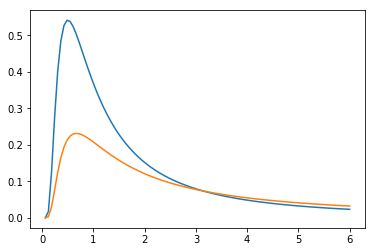

In [6]:
xs = np.linspace(0,6,100)
plt.plot(xs,tfd.InverseGamma(1.,1.).prob(xs.astype(np.float32)))
plt.plot(xs,tfd.InverseGamma(.5,1.).prob(xs.astype(np.float32)))

In [7]:
def star(f, *args, **kwargs):
    name = kwargs.get("name")
    if name == 'mixture_component_std':
        return np.column_stack([1e-10*np.ones(2, dtype='float32'), 10*np.ones(2,dtype='float32')])
    if name == 'mixture_weights':
        return np.column_stack([0.999*np.ones(2, dtype='float32'), 0.001*np.ones(2,dtype='float32')]).T
    if name == 'data_std':
        return 1e-10*np.ones((1,2), dtype='float32')
    if name == 'factor_loadings':
        return np.eye(2,dtype='float32')
    else:
        return f(*args,**kwargs)

In [113]:
def change_priors(f, *args, **kwargs):
    name = kwargs.get("name")
    if name == 'mixture_component_std':
        return ed.InverseGamma(concentration=.1, rate=.1, sample_shape=(n_sources,n_components_in_mixture), name='mixture_component_std')
    else:
        return f(*args,**kwargs)

In [ ]:
def plot_std_distribution(mixture_component_std):
    

In [114]:
def plot_source_distributions(sources):
    n_sources,n_components_in_mixture = sources.distribution.distribution.components_distribution.batch_shape
    batch_event_space = np.stack((n_sources*n_components_in_mixture)*[np.linspace(-6,6,1000).astype(np.float32)],axis=1).reshape(-1,n_sources,n_components_in_mixture)
    # first .distribution is Independent, 
    # second .distribution is MixtureSameFamily
    # components_distribution is Normal with batch_shape (n_components_in_mixture, n_sources)
    densities = sources.distribution.distribution.components_distribution.prob(batch_event_space)
    for i in range(n_sources):
        plt.show()
        for j in range(n_components_in_mixture):
            plt.plot(batch_event_space[:,i,j],densities[:,i,j])
    plt.show()

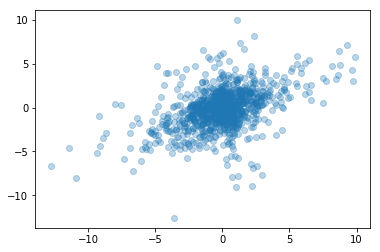

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 10) dtype=float32 numpy=
array([[0.23228037, 0.03842779, 3.2592123 , 0.3250279 , 0.2704698 ,
        0.32385764, 0.4655367 , 0.8504641 , 0.93000877, 1.3371706 ],
       [0.1450382 , 2.7057724 , 0.26846394, 0.89389414, 1.1286952 ,
        1.0624906 , 0.17102252, 0.83232504, 2.8411314 , 1.3377641 ]],
      dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 10) dtype=float32 numpy=
array([[0.00183308, 0.00760082, 0.1357949 , 0.02437562, 0.24833922,
        0.1885426 , 0.04653291, 0.12184472, 0.13649996, 0.08863616],
       [0.16074716, 0.10656769, 0.0307111 , 0.0520153 , 0.22118145,
        0.17933233, 0.05612295, 0.08566691, 0.07196579, 0.03568929]],
      dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 0.51081675, -5.310116  ],
       [-0.17374125, -1.6214018 ],
       [-0.11529779, -0.3961035 ],
       

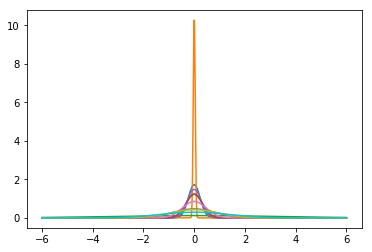

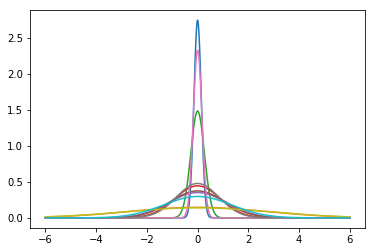

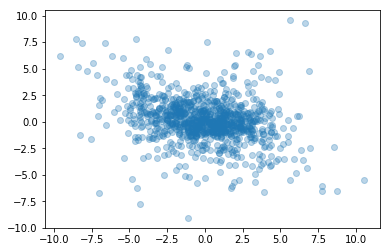

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 10) dtype=float32 numpy=
array([[0.87136936, 0.61059856, 2.275635  , 0.49564278, 1.6310742 ,
        2.9585967 , 0.46018076, 0.2514157 , 0.56397575, 0.27165055],
       [1.448617  , 0.7334516 , 1.0489283 , 0.83848906, 1.2593274 ,
        2.541257  , 0.30452642, 1.3727237 , 0.47005013, 5.596832  ]],
      dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 10) dtype=float32 numpy=
array([[0.15885492, 0.13349028, 0.02548246, 0.00759988, 0.24299662,
        0.00832601, 0.13528691, 0.10171543, 0.09221622, 0.0940313 ],
       [0.15750664, 0.13553905, 0.06221062, 0.18333675, 0.01560243,
        0.11545992, 0.04900245, 0.08366915, 0.04911623, 0.14855674]],
      dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[-0.05887443,  2.275629  ],
       [ 0.05881659,  1.198776  ],
       [ 0.4514285 , -1.3489969 ],
       

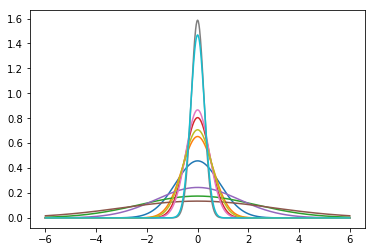

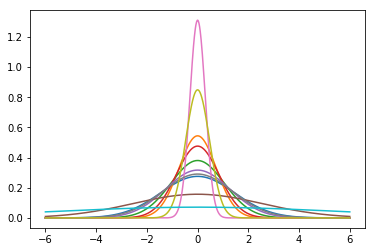

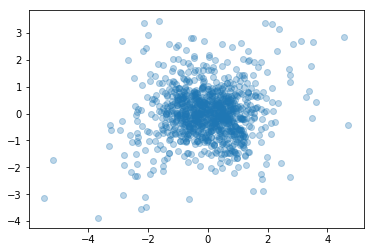

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 10) dtype=float32 numpy=
array([[2.2152348 , 2.273702  , 1.4227128 , 1.0587598 , 0.7462795 ,
        0.18865898, 0.73421377, 0.14094032, 1.025053  , 1.0451173 ],
       [1.7381648 , 1.1930758 , 0.06187797, 0.18549454, 0.13175888,
        1.1873533 , 0.33707002, 0.15118623, 1.2179371 , 1.2515075 ]],
      dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 10) dtype=float32 numpy=
array([[0.03936234, 0.16792853, 0.18704537, 0.12368229, 0.15052278,
        0.05641958, 0.03036468, 0.00784064, 0.1108562 , 0.12597756],
       [0.1196411 , 0.00845575, 0.00636363, 0.25736234, 0.00932148,
        0.02559264, 0.23903407, 0.2132379 , 0.0966567 , 0.02433442]],
      dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 0.4145424 ,  0.16187152],
       [-1.2897474 , -0.39655694],
       [ 1.2920411 ,  0.0051469 ],
       

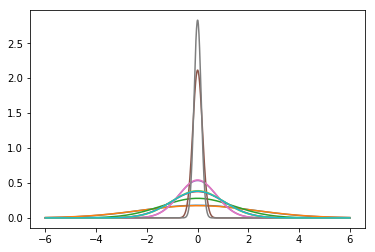

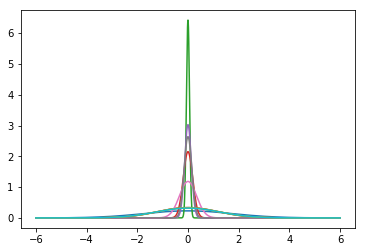

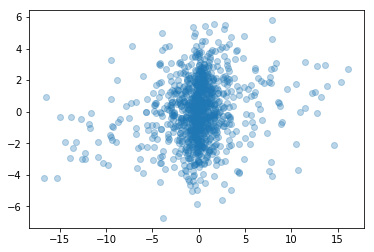

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 10) dtype=float32 numpy=
array([[0.29472014, 0.23566875, 1.5608342 , 0.16547923, 0.16424194,
        0.9932369 , 2.8380198 , 0.34381443, 0.16951646, 0.7192994 ],
       [0.14094752, 0.18937385, 1.1580702 , 0.2647617 , 1.9125315 ,
        0.92410046, 0.74839807, 0.408979  , 1.2379587 , 3.7969027 ]],
      dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 10) dtype=float32 numpy=
array([[0.3266404 , 0.04964109, 0.10633579, 0.00695642, 0.01523686,
        0.20056209, 0.07870699, 0.05669846, 0.13408968, 0.02513225],
       [0.10629659, 0.04907788, 0.2111375 , 0.06050837, 0.00285719,
        0.07990407, 0.12537755, 0.05276637, 0.11508835, 0.19698618]],
      dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 1.0984023 , -1.8056626 ],
       [ 0.26819032,  0.10138632],
       [ 0.16624373, -0.26804715],
       

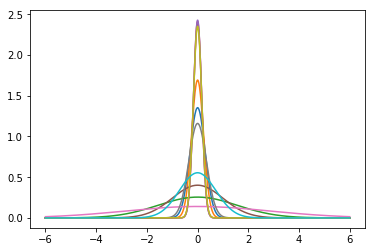

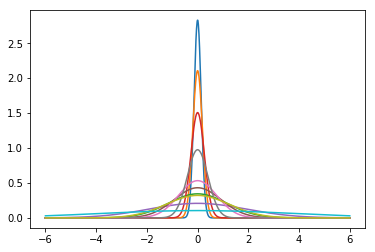

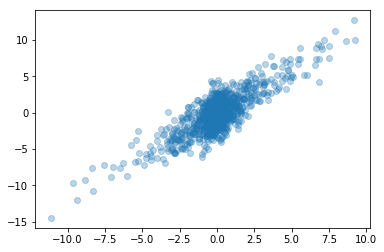

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 10) dtype=float32 numpy=
array([[0.11548077, 1.2310598 , 3.259915  , 0.4137494 , 0.02222205,
        0.275503  , 1.5944866 , 0.70306426, 0.05688885, 1.3490729 ],
       [1.1339217 , 1.9464065 , 0.39365467, 0.99121004, 0.43878204,
        0.27581888, 0.9868587 , 0.4983344 , 0.10924655, 1.8089589 ]],
      dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 10) dtype=float32 numpy=
array([[0.01801429, 0.08460123, 0.1450564 , 0.07019497, 0.10507365,
        0.17874205, 0.18778856, 0.01248867, 0.08226206, 0.11577814],
       [0.34766352, 0.07380327, 0.15980874, 0.04195055, 0.05590587,
        0.01043717, 0.01591258, 0.19111046, 0.05821592, 0.04519184]],
      dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 0.17465287,  1.2006044 ],
       [ 0.24629839, -0.74597055],
       [-0.79469496, -1.043487  ],
       

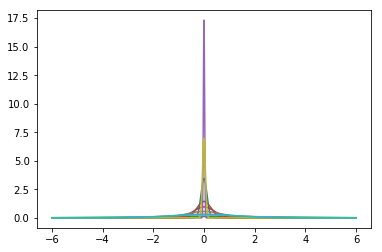

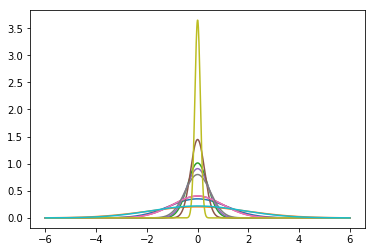

In [115]:
for i in range(5):
    with ed.interception(change_priors):
        with tape() as this_tape:
            model = centeredIndependentFactorAnalysis(n_components_in_mixture=10,n_sources=2,n_features=2)
            plt.scatter(*model.numpy().T,alpha=.3)
            plt.show()
        print(this_tape)
        plot_source_distributions(this_tape['sources'])

In [116]:
this_tape

OrderedDict([('mixture_component_std',
              <ed.RandomVariable 'mixture_component_std/' shape=(2, 10) dtype=float32 numpy=
              array([[0.11548077, 1.2310598 , 3.259915  , 0.4137494 , 0.02222205,
                      0.275503  , 1.5944866 , 0.70306426, 0.05688885, 1.3490729 ],
                     [1.1339217 , 1.9464065 , 0.39365467, 0.99121004, 0.43878204,
                      0.27581888, 0.9868587 , 0.4983344 , 0.10924655, 1.8089589 ]],
                    dtype=float32)>),
             ('mixture_weights',
              <ed.RandomVariable 'mixture_weights/' shape=(2, 10) dtype=float32 numpy=
              array([[0.01801429, 0.08460123, 0.1450564 , 0.07019497, 0.10507365,
                      0.17874205, 0.18778856, 0.01248867, 0.08226206, 0.11577814],
                     [0.34766352, 0.07380327, 0.15980874, 0.04195055, 0.05590587,
                      0.01043717, 0.01591258, 0.19111046, 0.05821592, 0.04519184]],
                    dtype=float32)>),
          

In [38]:
def plot_ancestry(tape):
    event_space = np.linspace(0,6,100).astype(np.float32)
    for ancestor_name,ancestor in tape.iteritems():
        plt.title(ancestor_name)
        print(ancestor_name)
        plt.plot(event_space,ancestor.distribution.prob(event_space))
        plt.show()

In [43]:
tmp = this_tape['mixture_weights'].distribution

In [48]:
this_tape['mixture_component_std'].distribution.event_shape == []

True

In [ ]:
tmp.

In [55]:
tmp.event_shape.as_list()

[2]

mixture_component_std


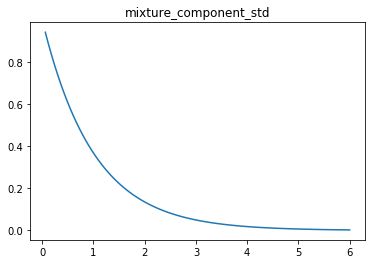

mixture_weights


InvalidArgumentError: Incompatible shapes: [2] vs. [100] [Op:Mul] name: mixture_weights/prob/mul/

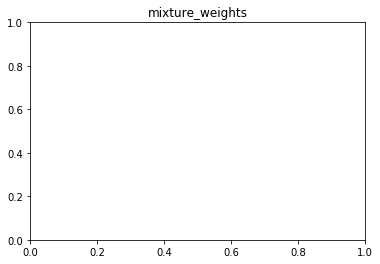

In [40]:
plot_ancestry(this_tape)